<a href="https://colab.research.google.com/github/habib-roy/google-colab-source-code/blob/master/Perbandingan_hasil_deteksi_tepi_menggunakan_Gradient_Based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perbandingan hasil deteksi tepi menggunakan Gradient Based**


1.   Sobel Operator
2.   Prewitt Operator
3.   Robert operator

In [267]:
from typing import TypeVar
from google.colab.patches import cv2_imshow
from numpy import asarray
from PIL import Image as im, ImageFilter
from google.colab import drive
import numpy as np
import numpy.typing as npt
import cv2
import matplotlib.pyplot as plt

In [268]:
T = TypeVar("T", bound=npt.NBitBase)

In [269]:
# declare function
def fOperator(operator,image):
    if operator == 'Sobel':
      Gx = [[1, 0, -1],
          [2, 0, -2],
          [1, 0, -1]]

      Gy = [[1, 2, 1],
          [0, 0, 0],
          [-1, -2, -1]]
    elif operator == 'Prewitt':
      Gx = [[-1, 0, 1],
          [-1, 0, 1],
          [-1, 0, 1]]

      Gy = [[-1, -1, -1],
          [0, 0, 0],
          [1, 1, 1]]
    else:
      Gx = [[1, 0],
          [0, -1]]

      Gy = [[0, 1],
          [-1, 0]]

    image = np.asarray(image)
    axes = image.shape

    rows = axes[0]
    cols = axes[1]
    mag = np.zeros_like(image) # to store output differential/gradient
    i=j=1

    if operator == 'Robert' :
      rangeSquareImageMinus = -2
      rangeSquareImagePlus = 2
    else:
      rangeSquareImageMinus = -3
      rangeSquareImagePlus = 3

    for row in range (rows)[1:rangeSquareImageMinus] :
      for col in range (cols)[1:rangeSquareImageMinus] :
        if np.shape(image[i:i+rangeSquareImagePlus, j:j+rangeSquareImagePlus]) == (rangeSquareImagePlus, rangeSquareImagePlus) :
          S1 = np.sum(np.multiply(Gx, image[i:i+rangeSquareImagePlus, j:j+rangeSquareImagePlus]))
          S2 = np.sum(np.sum(np.multiply(Gy, image[i:i+rangeSquareImagePlus, j:j+rangeSquareImagePlus])))
          mag[i+1, j+1] = np.sqrt(np.sum([np.square(S1), np.square(S2)]))
        j = j+1
      j = 1
      i = i+1
    mag = mag * (255.0 / mag.max())
    return mag

In [270]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


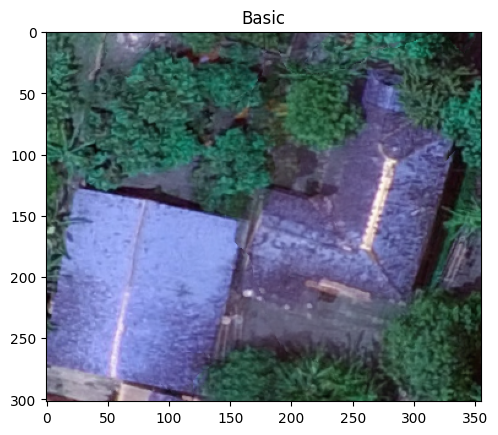

In [271]:
# load image
drive.mount('/content/drive')
image_path = '/content/drive/MyDrive/Kuliah S2/Semester 1/Computer Vision/content/sample.tif'
imageBasic = cv2.imread(image_path)

plt.title('Basic')
plt.imshow(imageBasic)
plt.show()

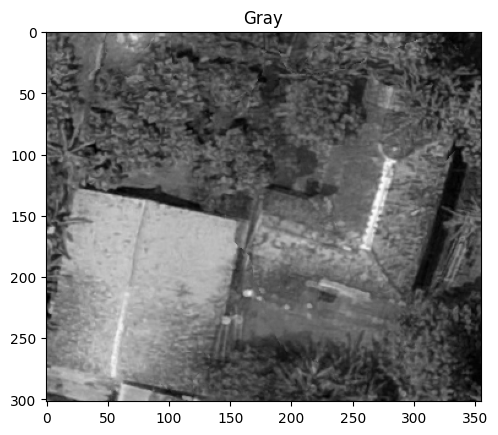

In [272]:
# image gray
imageGray = cv2.cvtColor(imageBasic, cv2.COLOR_BGR2GRAY)

plt.title('Gray')
plt.imshow(imageGray, cmap='gray')
plt.show()

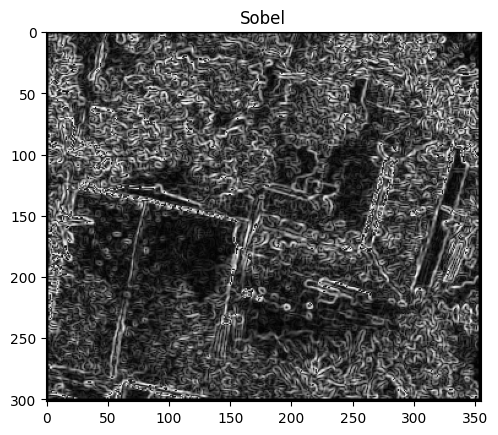

In [273]:
# convert gray image with Sobel operator
operator = 'Sobel'
imageEdge = fOperator(operator, imageGray)
plt.title(operator)
plt.imshow(imageEdge,cmap = 'gray')
plt.show()

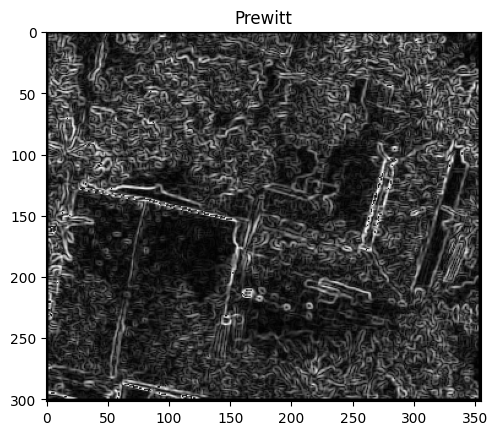

In [274]:
# convert gray image with Prewitt operator
operator = 'Prewitt'
imageEdge = fOperator(operator, imageGray)
plt.title(operator)
plt.imshow(imageEdge,cmap = 'gray')
plt.show()

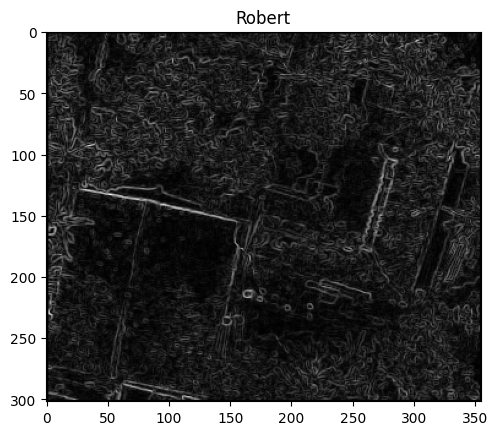

In [275]:
# convert gray image with Robert operator
operator = 'Robert'
imageEdge = fOperator(operator, imageGray)
plt.title(operator)
plt.imshow(imageEdge,cmap = 'gray')
plt.show()

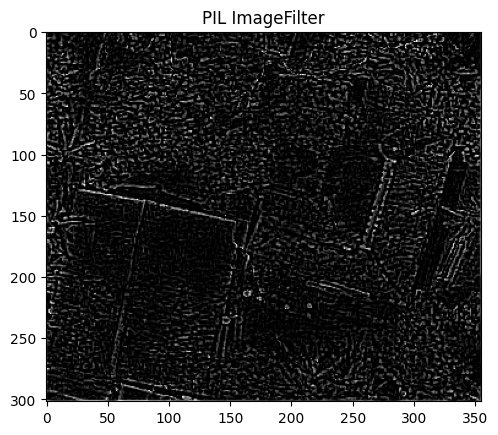

In [276]:
# convert gray image with PIL ImageFilter
imageBasic = im.open(image_path)
imageBasic = imageBasic.convert('L')
imageEdge = imageBasic.filter(ImageFilter.FIND_EDGES)
plt.title('PIL ImageFilter')
plt.imshow(imageEdge,cmap = 'gray')
plt.show()

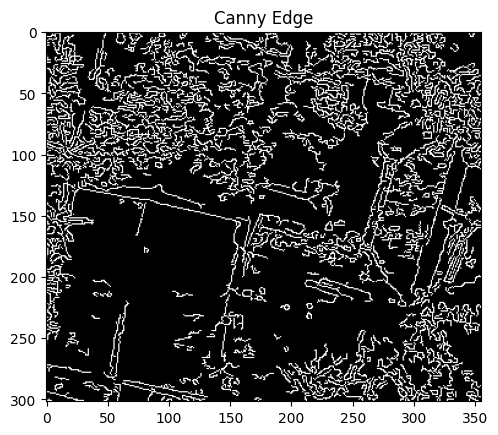

In [277]:
# convert gray image with canny edge
imageEdge = cv2.Canny(imageGray,100,200)
plt.title('Canny Edge')
plt.imshow(imageEdge,cmap = 'gray')
plt.show()